In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/crop_yield.csv') #imports the dataset

In [ ]:
df.head() #shows first 5 rows × 80 columns

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909


In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000


In [ ]:
df.columns #Shows the name of all the coulmns in the Dataset

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# List of columns to scale
columns_to_scale = ['Crop_Year', 'Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Fit and transform the data
df_scaled = scaler.fit_transform(df[columns_to_scale])

# Assign the scaled data back to the DataFrame
df_scaled_df = pd.DataFrame(df_scaled, columns=[col + '_scaled' for col in columns_to_scale])

# Concatenate the scaled data with the original DataFrame
df = pd.concat([df, df_scaled_df], axis=1)


In [ ]:
df.isnull().sum()

,0
Crop,0
Crop_Year,0
Season,0
State,0
Area,0
Production,0
Annual_Rainfall,0
Fertilizer,0
Pesticide,0
Yield,0


In [ ]:
df.nunique()

,0
Crop,55
Crop_Year,24
Season,6
State,30
Area,13644
Production,14016
Annual_Rainfall,634
Fertilizer,18598
Pesticide,17405
Yield,13551


In [ ]:
unique_states = df['State'].unique()
print(unique_states)

['Assam' 'Karnataka' 'Kerala' 'Meghalaya' 'West Bengal' 'Puducherry' 'Goa'
 'Andhra Pradesh' 'Tamil Nadu' 'Odisha' 'Bihar' 'Gujarat' 'Madhya Pradesh'
 'Maharashtra' 'Mizoram' 'Punjab' 'Uttar Pradesh' 'Haryana'
 'Himachal Pradesh' 'Tripura' 'Nagaland' 'Chhattisgarh' 'Uttarakhand'
 'Jharkhand' 'Delhi' 'Manipur' 'Jammu and Kashmir' 'Telangana'
 'Arunachal Pradesh' 'Sikkim']


In [ ]:
df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield',
       'Crop_Year_scaled', 'Area_scaled', 'Production_scaled',
       'Annual_Rainfall_scaled', 'Fertilizer_scaled', 'Pesticide_scaled',
       'Yield_scaled'],
      dtype='object')

In [ ]:
df_one_hot = pd.get_dummies(df, columns=['Crop', 'Season', 'State']) #one hot encoding to convert categorical variables such as 'Crop', 'Season', and 'State' into numerical representations

In [ ]:
#from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
#label_encoder = LabelEncoder()

# Apply label encoding to each categorical column
#df['Crop_encoded'] = label_encoder.fit_transform(df['Crop'])
#df['Season_encoded'] = label_encoder.fit_transform(df['Season'])
#df['State_encoded'] = label_encoder.fit_transform(df['State'])


In [ ]:
df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Crop_Year_scaled,Area_scaled,Production_scaled,Annual_Rainfall_scaled,Fertilizer_scaled,Pesticide_scaled,Yield_scaled
count,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,19689.000000,1.968900e+04,1.968900e+04,1.968900e+04,1.968900e+04
mean,2009.127584,1.799266e+05,1.643594e+07,1437.755177,2.410331e+07,4.884835e+04,79.954009,-1.516286e-14,2.598358e-17,0.000000,-3.464478e-17,-1.732239e-17,-1.010473e-17,1.876592e-17
std,6.498099,7.328287e+05,2.630568e+08,816.909589,9.494600e+07,2.132874e+05,878.306193,1.000025e+00,1.000025e+00,1.000025,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,1997.000000,5.000000e-01,0.000000e+00,301.300000,5.417000e+01,9.000000e-02,0.000000,-1.866375e+00,-2.455289e-01,-0.062482,-1.391199e+00,-2.538692e-01,-2.290314e-01,-9.103436e-02
25%,2004.000000,1.390000e+03,1.393000e+03,940.700000,1.880146e+05,3.567000e+02,0.600000,-7.891099e-01,-2.436328e-01,-0.062477,-6.084735e-01,-2.518895e-01,-2.273594e-01,-9.035121e-02
50%,2010.000000,9.317000e+03,1.380400e+04,1247.600000,1.234957e+06,2.421900e+03,1.030000,1.342605e-01,-2.328155e-01,-0.062430,-2.327797e-01,-2.408625e-01,-2.176764e-01,-8.986162e-02
75%,2015.000000,7.511200e+04,1.227180e+05,1643.700000,1.000385e+07,2.004170e+04,2.388889,9.037359e-01,-1.430310e-01,-0.062016,2.521087e-01,-1.485036e-01,-1.350637e-01,-8.831441e-02
max,2020.000000,5.080810e+07,6.326000e+09,6552.700000,4.835407e+09,1.575051e+07,21105.000000,1.673211e+00,6.908772e+01,23.986163,6.261494e+00,5.067539e+01,7.361928e+01,2.393878e+01


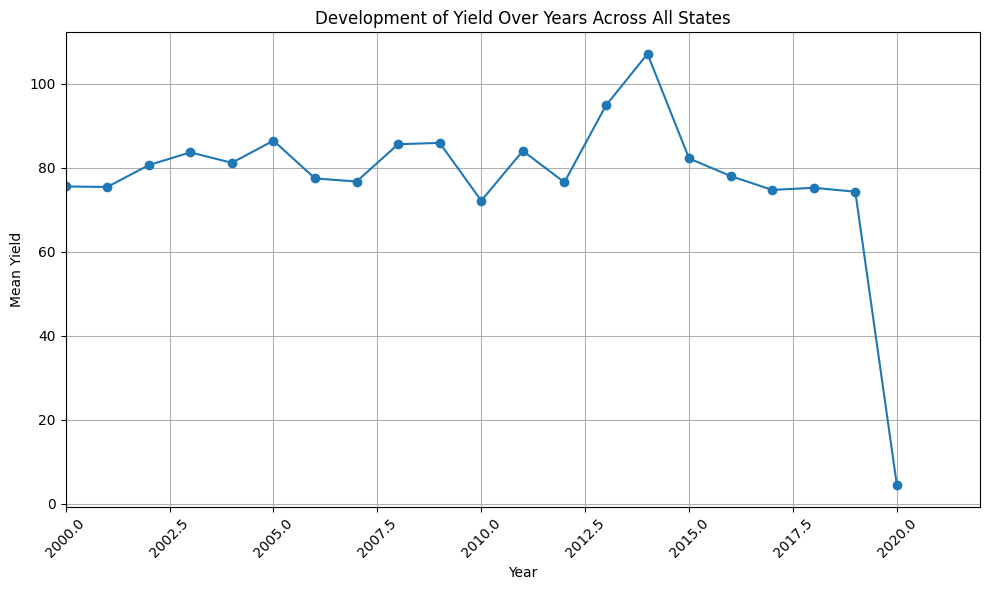

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Calculate the mean yield every year
yearly_yield = df.groupby('Crop_Year')['Yield'].mean().reset_index()

# Create a line plot to visualize the development of yield over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_yield['Crop_Year'], yearly_yield['Yield'], marker='o', linestyle='-')
plt.title('Development of Yield Over Years Across All States')
plt.xlabel('Year')
plt.ylabel('Mean Yield')
plt.grid(True)
plt.xticks(rotation=45)
plt.xlim(2000, 2022) #range of x-axis
plt.tight_layout()
plt.show()


In [ ]:
features = [ 'Crop_Year_scaled','Area_scaled','Production_scaled','Annual_Rainfall_scaled','Fertilizer_scaled','Pesticide_scaled']
target   = [ 'Yield_scaled' ]

X = df.loc[: , features]
Y = df.loc[: , target]

#X = df.loc[: , features]: This line creates a new DataFrame named X that contains all rows (indicated by :) and the columns specified in the features list.
#This DataFrame X will serve as the input features for the model.
#Y = df.loc[: , target]: Similarly, this line creates a new DataFrame named Y that contains all rows and the column specified in the target list.
#This DataFrame Y will be the target variable for the model.

In [ ]:
df.shape

(19689, 17)

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size = 0.4,random_state = 20)

In [ ]:
X_train.head()

,Crop_Year_scaled,Area_scaled,Production_scaled,Annual_Rainfall_scaled,Fertilizer_scaled,Pesticide_scaled
12819,0.442051,-0.244847,-0.062480,-0.172796,-0.253076,-0.228305
14074,0.749841,-0.185947,-0.062392,-1.005467,-0.184446,-0.161474
14575,0.903736,-0.240269,-0.062472,-0.844491,-0.247458,-0.223067
7027,-1.558585,-0.243795,-0.062475,-0.678618,-0.252449,-0.227423
17936,0.288156,-0.245210,-0.062482,-0.673476,-0.253457,-0.228670


In [ ]:
Y_train.head()

,Yield_scaled
12819,-0.089916
14074,-0.090379
14575,-0.090117
7027,-0.089231
17936,-0.090405


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


X_train_ls = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_ls = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))
Y_train_ls  = Y_train.values

print(X_train_ls.shape,X_train_ls[0])

(11813, 1, 6) [[ 0.44205067 -0.24484731 -0.06248026 -0.17279606 -0.25307566 -0.2283051 ]]


In [ ]:
model = Sequential([LSTM(units=100, input_shape=(X_train_ls.shape[1], X_train_ls.shape[2])),Dense(units=1)])

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_absolute_error')
model.summary()
early_stopping = EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train_ls, Y_train_ls, epochs=150, batch_size=32, validation_split=0.2,callbacks=[early_stopping], verbose=1)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100)                 │          42,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             101 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 42,901 (167.58 KB)

 Trainable params: 42,901 (167.58 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1044 - val_loss: 0.0736
Epoch 2/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0646 - val_loss: 0.0663
Epoch 3/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0610 - val_loss: 0.0649
Epoch 4/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0540 - val_loss: 0.0642
Epoch 5/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0774 - val_loss: 0.0629
Epoch 6/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0699 - val_loss: 0.0619
Epoch 7/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0549 - val_loss: 0.0608
Epoch 8/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0580 - val_loss: 0.0598
Epoch 9/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0590 - val_loss: 0.0587
Epoch 10/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0538 - val_loss: 0.0577
Epoch 11/150
296/296 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0712 - val_loss: 0.0555
Epoch 12/150
296/296 ━━━━━━━━━━━━━━━━━━━

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


Y_pred = model.predict(X_test_ls)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)
print("Mean Squared Error:", mse)

247/247 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error: 0.029244060794912652
R-squared (R2): 0.8271841013127466
Mean Squared Error: 0.17663903577798135


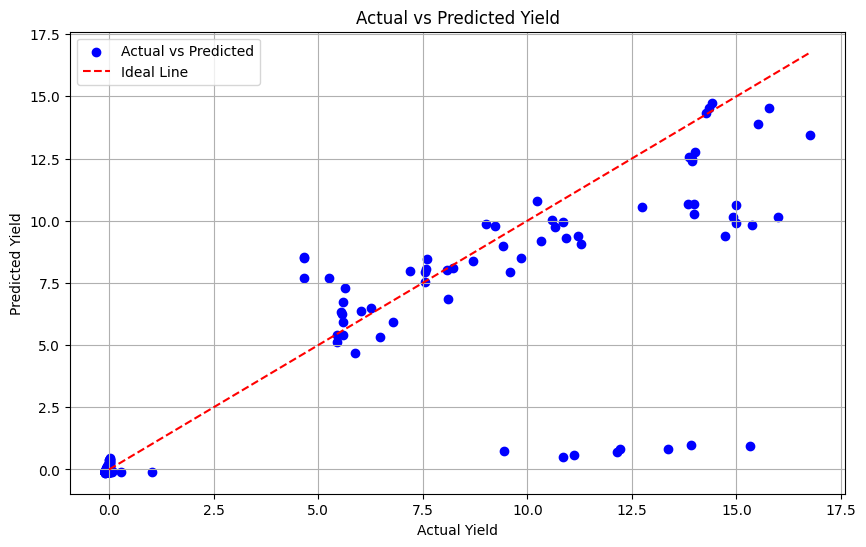

In [ ]:
import numpy as np

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(Y_test.values, Y_pred, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(Y_test), np.max(Y_pred)])

plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [ ]:
from sklearn.tree import DecisionTreeRegressor # Use Regressor for continuous target
from sklearn.model_selection import train_test_split

model = DecisionTreeRegressor() # Changed to regressor
# Train-test split (assuming you have X, y data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


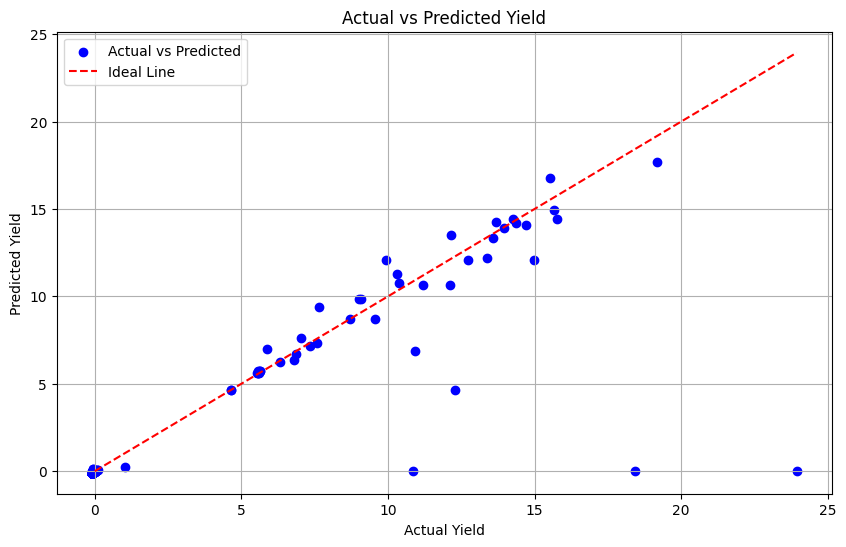

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(Y_test.values, y_pred, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(Y_test), np.max(y_pred)])

plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the XGBoost regressor
model = xgb.XGBRegressor(objective='reg:squarederror')

# Train the model
model.fit(X_train, Y_train)

# Make predictions on the test set
y_predict = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(Y_test, y_predict)
mae = mean_absolute_error(Y_test, y_predict)
r2 = r2_score(Y_test, y_predict)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared (R2):", r2)

Mean Squared Error: 0.19489130891953746
Mean Absolute Error: 0.019813448581474203
R-squared (R2): 0.8065306336135439


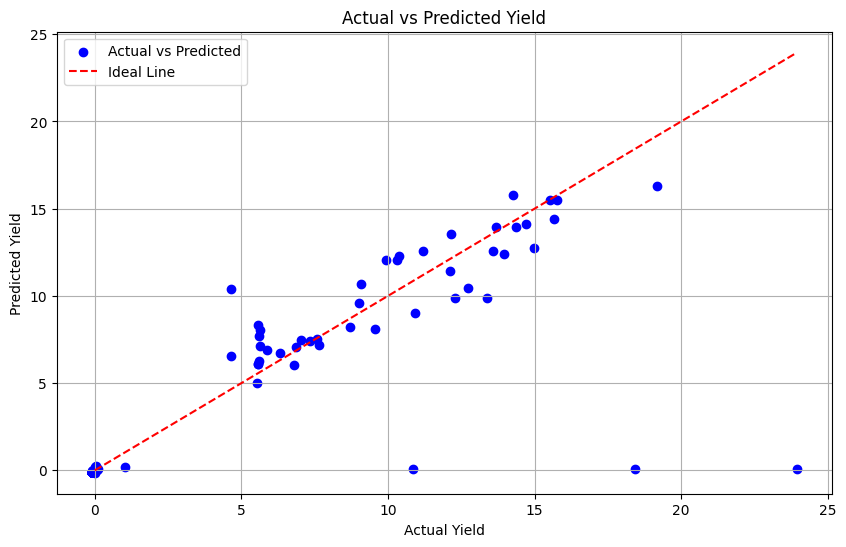

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.scatter(Y_test.values,y_predict, color='blue', label='Actual vs Predicted')

max_val = np.max([np.max(Y_test), np.max(y_predict)])

plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Ideal Line')

plt.title('Actual vs Predicted Yield')
plt.xlabel('Actual Yield')
plt.ylabel('Predicted Yield')
plt.legend()
plt.grid(True)
plt.show()

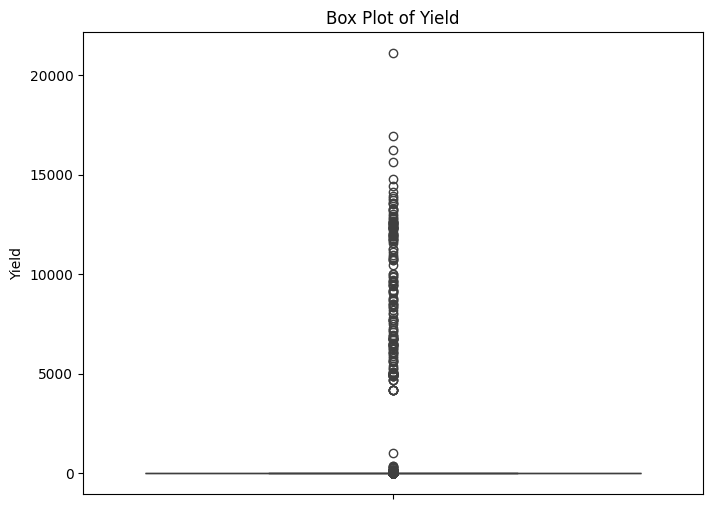

Number of outliers detected: 164
Outlier values: 3         5238.051739
60        5376.054286
94       13003.787780
150       6045.886957
178       4867.650000
             ...     
18561    11250.412500
18855     4909.375000
18862     4951.730000
18869     4974.045000
18876     4993.770000
Name: Yield, Length: 164, dtype: float64


In [ ]:
import seaborn as sns
from scipy.stats import zscore

plt.figure(figsize=(8, 6))
sns.boxplot(data=df['Yield'])
plt.title('Box Plot of Yield')
plt.show()

z_scores = zscore(df['Yield'])

outliers = df['Yield'][abs(z_scores) > 3]

print("Number of outliers detected:", len(outliers))
print("Outlier values:", outliers)

In [45]:
from sklearn.svm import SVR  # Import SVR for regression
import numpy as np

# Train-test split (assuming you have X, y data)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
Y=Y.ravel()

# Create and train the SVM model
model = SVR()
model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)
